### Урок 5. Использование алгоритмов оптимизации для улучшения качества модели.
Задание

Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения). Запишите и сравните результаты метрик качества и скорости сходимости модели.

Познакомиться с работой стохастического градиентного спуска. Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD - модель SGDClassifier библиотека sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском (используйте логистическую регрессию).

Сравнить разные алгоритмы оптимизации.

Обучитe модель логистической регрессии на этих данных, используя разные оптимизаторы, и сравните их эффективность. Используйте параметр solver, который может принимать значения:
'liblinear': использует координатный спуск (Coordinate Descent, CD). Хорошо подходит для небольших датасетов.
'lbfgs': аппроксимация метода Бройдена – Флетчера – Гольдфарба – Шанно (BFGS). Рекомендуется для небольших и средних датасетов.
'newton-cg': Ньютоновский метод сопряженных градиентов. Требует много ресурсов для больших датасетов из-за необходимости вычисления матрицы Гессе.
'sag': Стохастический градиентный спуск с использованием среднего градиента. Подходит для больших датасетов.
'saga': Расширение 'sag', поддерживает L1-регуляризацию, такое сочетание регуляризаций делает его вариацией метода Elastic Net.

Импортируем библиотеки

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Загрузим датасет

In [207]:
df = pd.read_csv('Cancer_Data.csv')
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


Эти данные представляют собой набор из 569 наблюдений, который содержит различные характеристики опухолей. Каждый столбец описывает различные свойства опухоли. Выполним базовый анализ данных

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [209]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

В данном наборе данных можно:
id: Этот столбец представляет собой уникальный идентификатор каждой записи. Он не содержит полезной информации для анализа или обучения модели и может быть удален, чтобы избежать влияния на алгоритмы машинного обучения

Unnamed: 32: Этот столбец полностью пуст (0 значений). Он не содержит никакой информации и может быть удален без ущерба для анализа данных.

In [210]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [211]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [212]:
duplicates.sum()

0

Посмотрим на статистические данные

In [213]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Выводы:
1. В наборе данных представлено достаточно разнообразие характеристик опухолей.
2. Столбцы с высокой дисперсией могут играть важную роль в модели, так как они содержат больше информации для разделения классов.

In [214]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### Визуализация данных

<Axes: ylabel='Cancer'>

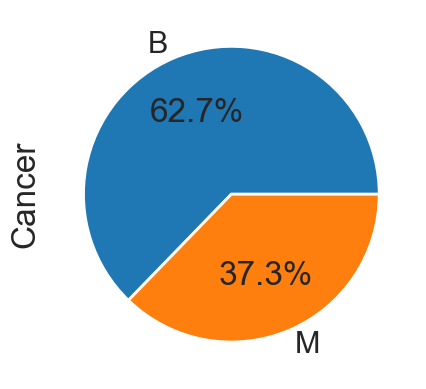

In [215]:
sns.set_context('poster')
sns.set_style('darkgrid')
df.groupby('diagnosis').size().plot(kind='pie',
                                       y = "Outcome",
                                       label = "Cancer",
                                       autopct='%1.1f%%')

Наблюдаем ситуацию дисбаланса классов в данных. С долей 62.7% участников, с доброкачественной опухолью (класс "B"), и 37.3% участников, имеющих злокачественную опухоль (класс "М").Данный набор данных имеет низкое представительство одного из классов по сравнению с другим.

C:\Users\Olesya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olesya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olesya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Olesya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

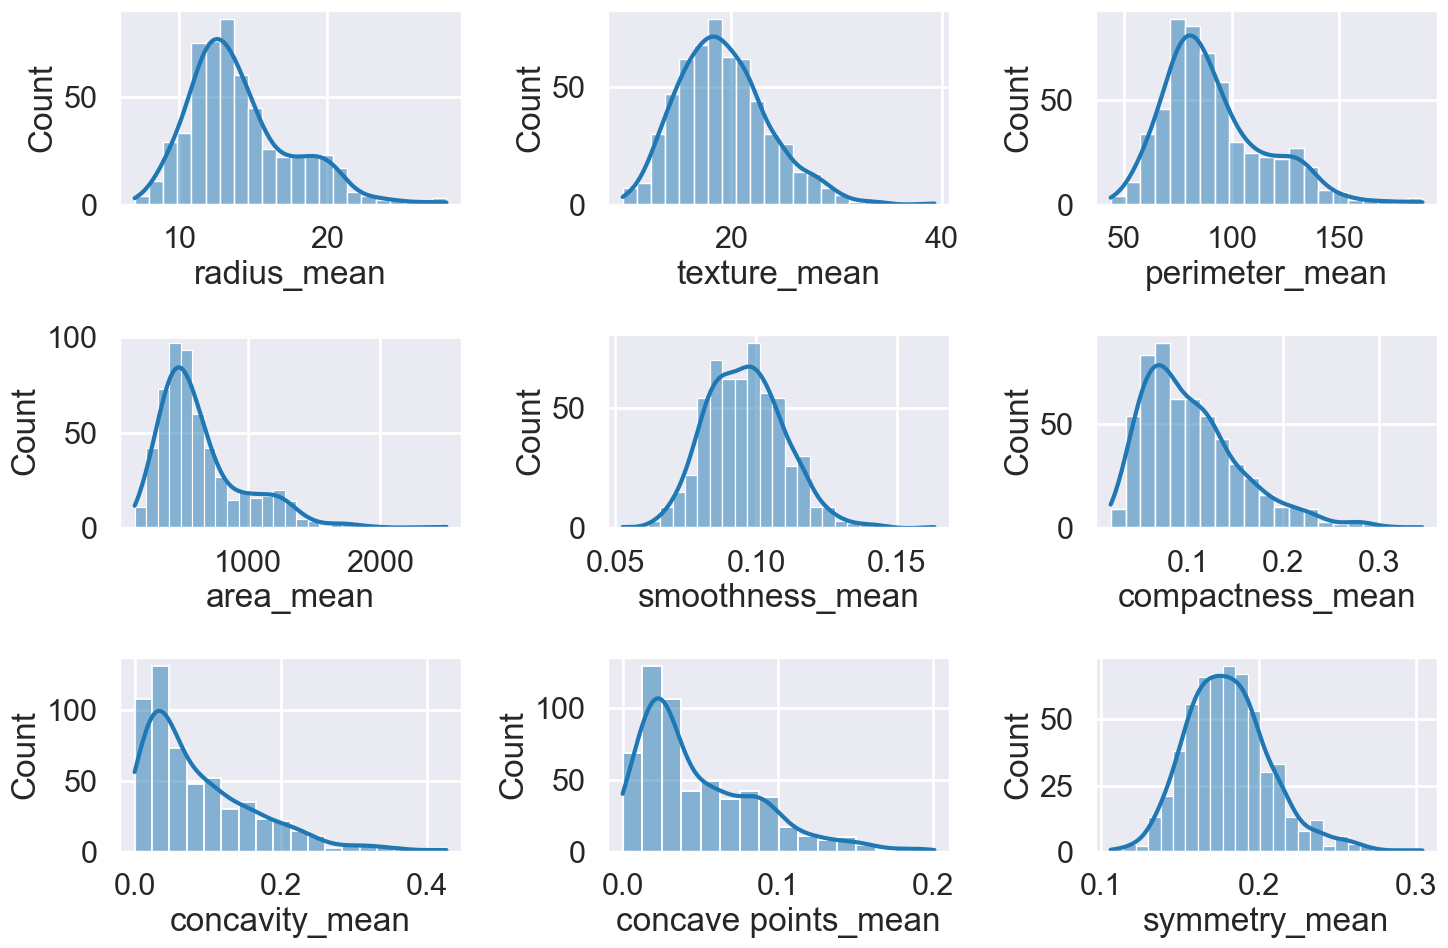

In [216]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['radius_mean', 'texture_mean', 'perimeter_mean',
                   'area_mean','smoothness_mean',
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

In [217]:
df['diagnosis'] = [1 if i=='M' else 0 for i in df['diagnosis']]
df.head().T

,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900


In [218]:
df['diagnosis'].unique()

array([1, 0], dtype=int64)

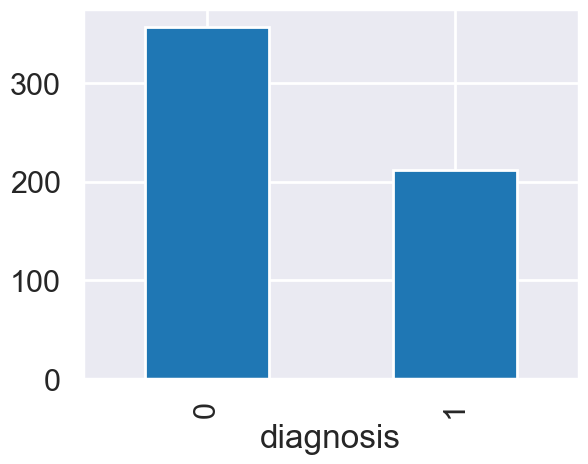

In [219]:
df['diagnosis'] = df['diagnosis'].astype('category', copy = False)
df['diagnosis'].value_counts().plot(kind = 'bar');

Стандартизируем наши данные и раздели на обучающую и тестовую выборки

In [220]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [221]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [222]:
# Список значений C
C_values = [0.01, 0.1, 1, 10, 100]
results = []

In [223]:
# Обучение моделей и оценка качества
results = []
for C in C_values:
    # Обучение модели
    start_time = time.time()
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)

    # Расчет метрик качества
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Запись результатов
    results.append({'C': C, 'Accuracy': accuracy, 'Recall': recall, 
                    'Precision': precision, 'F1-score': f1, 'Training Time': training_time})


C:\Users\Olesya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [224]:
# Преобразование результатов
results_df = pd.DataFrame(results)
print(results_df)

        C  Accuracy    Recall  Precision  F1-score  Training Time
0    0.01  0.964912  0.906977   1.000000  0.951220       0.005106
1    0.10  0.982456  0.953488   1.000000  0.976190       0.005454
2    1.00  0.973684  0.953488   0.976190  0.964706       0.008275
3   10.00  0.973684  0.976744   0.954545  0.965517       0.012842
4  100.00  0.938596  0.976744   0.875000  0.923077       0.016073


Анализ результатов:

Наилучшая точность была достигнута при меньшиях С .01 и 0.10

С увеличением значения С точность модели незначительно снижается, что может указывать на переобучение модели на тренировочные данне.

Время выполнения модели значительно увеличивается с ростом значеня С.

На основе этих результатов можно рекомендовать использов0.01 или 0.10 для достижения оптимальной точности при умеренном времени выполнения.

### 2 . Используем при работе градиентный спуск

In [225]:
# Логистическая регрессия
logistic_model = LogisticRegression(max_iter=10000, random_state=42)
start_time = time.time()
logistic_model.fit(X_train, y_train)
end_time = time.time()
logistic_time = end_time - start_time
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test))

In [226]:
# SGDClassifier
sgd_model = SGDClassifier(loss='log', max_iter=10000, random_state=42)
start_time = time.time()
sgd_model.fit(X_train, y_train)
end_time = time.time()
sgd_time = end_time - start_time
sgd_accuracy = accuracy_score(y_test, sgd_model.predict(X_test))

C:\Users\Olesya\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [227]:
# Результаты
results = {
    'Model': ['Logistic Regression', 'SGDClassifier'],
    'Accuracy': [logistic_accuracy, sgd_accuracy],
    'Time': [logistic_time, sgd_time]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy      Time
0  Logistic Regression  0.973684  0.012746
1        SGDClassifier  0.938596  0.004789


модель Logistic Regression показала большую точность, но занимает в 4 раза больше воемени.

### 3. На исходном наборе данных обучим модель логистической регрессии, используя разные оптимизаторы, и сравним их эффективность.

In [234]:
# Список оптимизаторов
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
results = []

In [235]:
# Обучение и оценка моделей с различными оптимизаторами
for solver in solvers:

    model = LogisticRegression(solver=solver, max_iter=10000, random_state=42)

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    results.append({
        'Solver': solver,
        'Accuracy': accuracy,
        'Time': end_time - start_time
    })

# Преобразование результатов
results_df = pd.DataFrame(results)
print(results_df)

0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
0.9736842105263158
      Solver  Accuracy      Time
0  liblinear  0.973684  0.008114
1      lbfgs  0.973684  0.008846
2  newton-cg  0.973684  0.007704
3        sag  0.973684  0.084265
4       saga  0.973684  0.132190


Все оптимизаторы показывают одинаковую точность (почему?).
Наиболее быстрым оказалсnewton-cgar, что делает его подходящим для быстрого обучения на небольших датасетать.